<a href="https://colab.research.google.com/github/vshlpunjabi/ML-Jungle/blob/master/PCA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [0]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

In [0]:
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [0]:
features = ['sepal length', 'sepal width', 'petal length', 'petal width']

In [0]:
x = df.loc[:, features].values

In [0]:
y = df.loc[:,['target']].values

In [0]:
x = StandardScaler().fit_transform(x)

In [0]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

In [0]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2'])

In [0]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

In [0]:
finalDf.describe()

,PC1,PC2
count,1.500000e+02,1.500000e+02
mean,3.049413e-16,7.126244e-17
std,1.711828e+00,9.630180e-01
min,-2.774170e+00,-2.658063e+00
25%,-2.121636e+00,-5.946612e-01
50%,4.145452e-01,8.434525e-03
75%,1.342582e+00,5.878221e-01
max,3.309141e+00,2.722371e+00


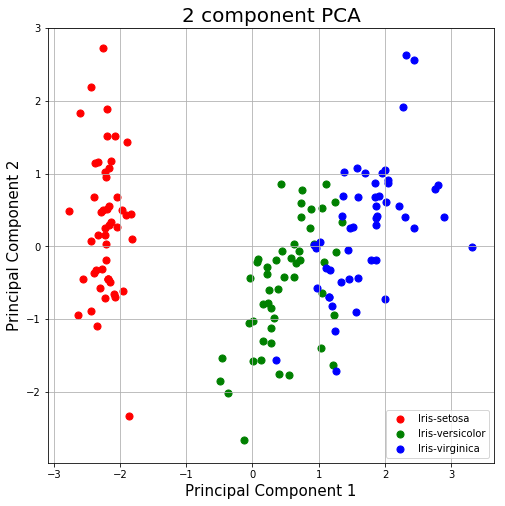

In [0]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [0]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])